# PROJECT NOTEBOOK
# Tabitha Weinbrenner
**CSME 201 SEC 007**

**Is gender inequality still prevalent in the industrialized/developed nations? If so, what are the main factors contributing to it's common issues, such as the wage gap?**

*The large portion will primarily be based on the US to slim the data for more precise results.*

# Background and Motivation

According to American Association of University Women, women working full time in the U.S. are still paid just 83 cents to every dollar earned by men. Many studies have been generated over the years that show a gradual decrease in the wage gap, and increase in Women in STEM fields, as well as an increase of women in the workforce overall.
While these studies and statistics are undoubtedly a good thing, what does this data truly represent? What can we infer from a statistical analysis of women in the workforce overtime? Census data and statistical reporting, as well as educational analysis articles, all seem to have a variety of answers to why the percent pay difference between men and women is so prominent. They range from gender biases about women not willing to work in STEM based careers, from lack of access to education, violence and sexual harassment in the workplace, and universities or employers not having environmental accommodations to promote women into STEM fields, among many more.
The issues for women don't just start and stop at the monetary disparities. Women experience unique and unfortunate circumstances that hinder them greatly, all around the world. Historically, in many countries, women lacked access to proper education, civil liberties, positions of power, and experienced forms of sexual/physical violence (such as child marriage, domestic abuse, etc.) Are they still occurring in today’s world? If so, are these occurrences also decreasing overtime?
This project will be used to dig deeper into what issues effect women today, as well as what aspects of the world contribute to them. I will be looking into data from The Organization for Economic Co-operation and Development, CORGIS Global Set, as well as UN Global Data, and comparing my results to articles, government statistics, and college research papers to come to conclusions on the following questions:

**1. Is the Wage Gap still occurring, and what are it's root causes?**

**2. Is gender inequality as prevalent in the US as it is to other less developed nations?**

**3. What other gender inequality issues are common besides the wage gap?**


# Methodology

**Below this cell are the libraries imported for analysis:**

In [53]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# These are the Dataframes imported below this cell, and their definitions/content relative to the analysis project.

### The datasets below were provided by Organization for Economic Co-operation and Development (OECD):

**Wage_Gap Dataframe:** *The difference between median earnings of men and women relative to median earnings of men.*

https://data.oecd.org/earnwage/gender-wage-gap.htm

**F_Politics Dataframe:** *The women in politics indicator includes data on; Women parliamentarians: the share of women in the national lower or single houses of parliament, measured as a percentage of total parliamentarians. Women ministers, the share of women ministers, including deputy prime ministers and ministers. Prime ministers/heads of government were also included when they held ministerial portfolios.Vice-presidents and heads of governmental or public agencies have not been included in the total.*

https://data.oecd.org/inequality/women-in-politics.htm

**Violence Against Women Dataframe:** *The violence against women indicator presents you with data on: Attitudes toward violence: The percentage of women who agree that a husband/partner is justified in beating his wife/partner under certain circumstances Prevalence of violence in the lifetime: The percentage of women who have experienced physical and/or sexual violence from an intimate partner at some time in their life Laws on domestic violence: Whether the legal framework offers women legal protection from domestic violence Laws on domestic violence are presented as values ranging from 0 to 1, where 0 means that laws or practices do not discriminate against women’s rights and 1 means laws or practices fully discriminate against women’s rights.

https://data.oecd.org/inequality/violence-against-women.htm

**Income Inequality Dataframe:** *Income is defined as household disposable income in a particular year. It consists of earnings, self-employment and capital income and public cash transfers; income taxes and social security contributions paid by households are deducted. The income of the household is attributed to each of its members, with an adjustment to reflect differences in needs for households of different sizes. Income inequality among individuals is measured here by five indicators*

https://data.oecd.org/inequality/income-inequality.htm

**SIGI Dataframe:** *The Social Institutions and Gender Index (SIGI) is a cross-country measure of discrimination against women in social institutions. The SIGI covers the following dimensions of discriminatory social institutions: Discriminatory family code, Restricted physical integrity, Restricted resources and assets, Restricted civil liberty The index presents scores ranging from 0 to 1, with 0 meaning there is no discrimination against women and 1 meaning indicating there is a very high level of discrimination against women.*

https://data.oecd.org/inequality/social-institutions-and-gender.htm#indicator-chart

### This set is provided by CORGIS: The Collection of Really Great, Interesting, Situated Datasets:
(By Austin Cory Bart, Ryan Whitcomb, Jason Riddle, Omar Saleem, Dr. Eli Tilevich, Dr. Clifford A. Shaffer, Dr. Dennis Kafura)

**Global_Development Dataframe:** The following data contains records collected on different countries and geographic locations from 1980 - 2013 from the World Bank. Included is different data about urban development, agriculture and rural development, health, and infrastructure.

https://think.cs.vt.edu/corgis/csv/global_development/

### The following sets are provided by http://data.un.org and Kaggle:

**International_Homocide Dataframe:** In this dataset you will find information about crimes over the past couple of decades across all UN countries.

https://www.kaggle.com/rishidamarla/intentional-homicides-and-other-crimes


In [3]:
#Dataframes imported for analysis:

Wage_Gap = pd.read_csv("OECD Wage Gap.csv",delimiter = ",")
F_Politics = pd.read_csv("Woman In Politics.csv",delimiter = ",")
Global_Development = pd.read_csv("global_development.csv")
SIGI = pd.read_csv("SIGI.csv")
Income_Inequality = pd.read_csv("Income_Inequality.csv")
Violence = pd.read_csv("violence_against_women.csv")
Int_Homicide = pd.read_csv("International Homocide.csv",header = [1])

In [4]:
# Run this cell as code instead of markdown if you want to see a summary of the sets imported:
print(Int_Homicide.head())
print(Wage_Gap.head())
print(F_Politics.head())
print(Global_Development.head())
print(SIGI.head())
print(Income_Inequality.head())
print(Violence.head())

   Region/Country/Area                     Unnamed: 1  Year  \
0                    1  Total, all countries or areas  2005   
1                    1  Total, all countries or areas  2005   
2                    1  Total, all countries or areas  2005   
3                    1  Total, all countries or areas  2010   
4                    1  Total, all countries or areas  2010   

                                              Series    Value  Footnotes  \
0             Intentional homicide rates per 100,000   6.2935        NaN   
1  Percentage of male and female intentional homi...  10.0798        NaN   
2  Percentage of male and female intentional homi...   2.4473        NaN   
3             Intentional homicide rates per 100,000   6.0228        NaN   
4  Percentage of male and female intentional homi...   9.5954        NaN   

                                              Source  
0  United Nations Office on Drugs and Crime (UNOD...  
1  United Nations Office on Drugs and Crime (UNOD...  

**Working with the Wage Gap data set:**

The Wage Gap data set comes from the OECD, and contains information about the global differences between the median earnings of men vs women for 38 of the world’s nations. (Those are the countries who have joined the OECD)
    
In the cells below, I have filtered the set for only data relative to the United States. This was then plotted against all years available in the set, such that the percent difference in median earnings yearly would be displayed from 1975 to 2020, the most recent data available.
    
The graph shows a gradual decrease in the difference overtime, along with some outliers dependent on the year.


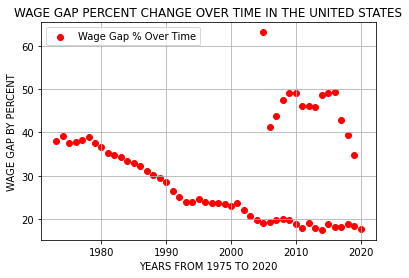

In [5]:
#Plotting only the Gap change overtime in the US:
MASK = Wage_Gap["LOCATION"] == "USA"
USA_Gap = Wage_Gap[MASK]

plt.scatter(USA_Gap["TIME"],USA_Gap["Value"],color = "red",label = "Wage Gap % Over Time")
plt.xlabel("YEARS FROM 1975 TO 2020")
plt.ylabel("WAGE GAP BY PERCENT")
plt.grid()
plt.title("WAGE GAP PERCENT CHANGE OVER TIME IN THE UNITED STATES")
plt.legend()

**We can see a trend here, the wage gap decreases as time goes on.**

But this is just for the United States, to fully understand the extent of the wage gap, we need to see how it compares in modern times for other countries as well. The OECD only contains 38 countries, mainly developed/first-world nations, so we will focus on analyzing those for the following sections.

The American Association of University Women Stated: "The gender pay gap exists for every age group and widens over a woman’s lifetime. It increases over the course of a woman’s work life and is widest for women ages 55–64."

Below this cell, I have removed the outliers from the set using interquartile range (IQR) so we can get a more accurate visual of which specific countries hold the highest current wage difference percentage.

After removing the outliers, I have filtered the data for only the years after 2019, to get the most current statistics for the wage gap. This is displayed as a bar graph, with the countries containing the largest percent difference between median earnings shown in comparison to others. (This non-outlier set will be used later in the notebook for Linear Regression)

I used this graph along with the filtered data to pull the countries with the highest wage gap, and use them for the next section.


In [6]:
Q25 = np.percentile(Wage_Gap["Value"], 25,interpolation = 'midpoint')
Q75 = np.percentile(Wage_Gap["Value"], 75,interpolation = 'midpoint')
IQR = Q75 - Q25
print("Percentiles:","25th =",Q25,"75th =",Q75,"IQR =",IQR)


Cut_Off = IQR * 1.5
lower_cut = Q25 - Cut_Off
upper_cut = Q75 + Cut_Off

# Getting the outliers:
Outliers = []
for i in Wage_Gap["Value"]:
    if i > upper_cut or i < lower_cut:
        Outliers.append(i)
print("These are the outliers in the dataset:",Outliers)   

# Removing them for a clean set:
Mask = ((Wage_Gap["Value"] > lower_cut) & (Wage_Gap["Value"] < upper_cut)) 
Wage_Gap2 = Wage_Gap[Mask]
print("Length before removed,",len(Wage_Gap),"Length after outliers removed,",len(Wage_Gap2))

Percentiles: 25th = 12.835695466499999 75th = 32.339782715 IQR = 19.5040872485
These are the outliers in the dataset: [61.635009766, 61.631919861, 61.928142548, 62.25012207, 63.200000763, -23.14301491, -28.11709785, -30.37996864, -25.50544167, -24.27906418, -22.17424011, -25.08417702, -19.22379303]
Length before removed, 1180 Length after outliers removed, 1167


These are the countries with the highest wage gap %, ['AUS' 'AUT' 'CAN' 'CZE' 'FIN' 'DEU' 'JPN' 'KOR' 'MEX' 'NZL' 'SVK' 'GBR'
 'USA']


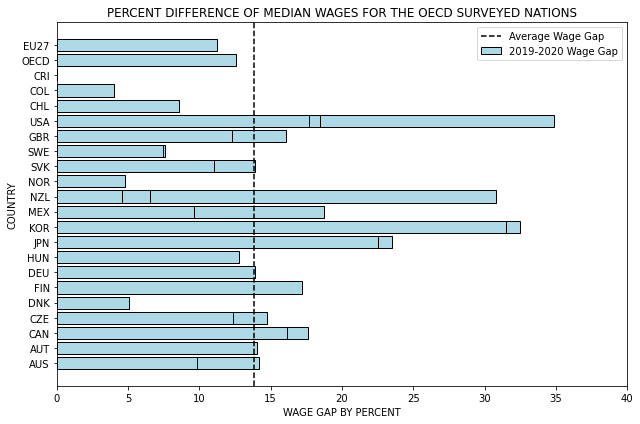

In [7]:
MASK = Wage_Gap2["TIME"] >= 2019
Current_Gap = Wage_Gap2[MASK]

plt.figure(figsize=(9,6))
plt.barh(Current_Gap["LOCATION"],Current_Gap["Value"],color = "lightblue",label = "2019-2020 Wage Gap",edgecolor = "black")
plt.ylabel("COUNTRY")
plt.xlim([0,40])
plt.axvline(x = 13.855060791192647, label = "Average Wage Gap",color = "black",linestyle = "--")
plt.xlabel("WAGE GAP BY PERCENT")
plt.title("PERCENT DIFFERENCE OF MEDIAN WAGES FOR THE OECD SURVEYED NATIONS")
plt.tight_layout()
plt.legend()

MASK = Current_Gap["Value"] >= 13.855060791192647
Top_Gap = Current_Gap[MASK]
print("These are the countries with the highest wage gap %,",Top_Gap["LOCATION"].unique())

**Using the Income Inequality data from the OECD, we can take a closer look as to why countries like Korea, Japan, The United States, New Zealand, Mexico, and others, have some of the highest Wage Gaps in the set.**

These countries do not necessarily have the highest wage gap percentage overall, just for the surveyed nations included in the OECD dataset!

Below this cell, I have pulled only data for income inequality for the countries found to have the highest wage gap.

Using the Income_Inequality dataframe, I found the mean values for all nations in the OECD dataset of income inequality.

The countries % income inequality values were then bar graphed, and the mean was placed on the y-axis to demonstrate each nations differences, relative to the mean.

This data is for only the most current income inequality statistics available, after 2017.

In [8]:
# Datasets being filtered for the selected nations found in the Wage_Gap set:


Income_Filtered = Income_Inequality.loc[(Income_Inequality["LOCATION"] == "MEX") |(Income_Inequality["LOCATION"] == "JPN") | 
                                        (Income_Inequality["LOCATION"] == "USA") | (Income_Inequality["LOCATION"] == "KOR") |
                                        (Income_Inequality["LOCATION"] == "NZL") | (Income_Inequality["LOCATION"] == "AUS") |
                                        (Income_Inequality["LOCATION"] == "AUT") | (Income_Inequality["LOCATION"] == "CAN") | 
                                        (Income_Inequality["LOCATION"] == "CZE") | (Income_Inequality["LOCATION"] == "FIN") |
                                        (Income_Inequality["LOCATION"] == "DEU") | (Income_Inequality["LOCATION"] == "SVK") |
                                        (Income_Inequality["LOCATION"] == "GBR")]
#2019 Filter for Income Inequality
MASK2 = Income_Filtered["TIME"] >= 2017
Income_Filtered = Income_Filtered[MASK2]

# Finding the means of each sets percentages:
print("This is the mean of income inequality percentages for all nations in the set,", Income_Inequality["Value"].mean())


This is the mean of income inequality percentages for all nations in the set, 2.642837004405292


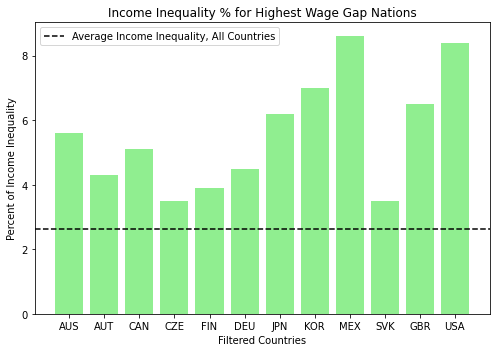

In [9]:
# Plotting each datasets values relative to the mean:
plt.figure(figsize=(7,5))
plt.bar(Income_Filtered["LOCATION"],Income_Filtered["Value"], color = "lightgreen")
plt.axhline(y = 2.642837004405292, color = "black",label = "Average Income Inequality, All Countries",linestyle = "--")
plt.xlabel("Filtered Countries")
plt.ylabel("Percent of Income Inequality")
plt.title("Income Inequality % for Highest Wage Gap Nations")
plt.legend()

plt.tight_layout()

**What can be observed from this?**

Every single one of the nations tested were significantly above the average income inequality rate. This seems to be a good indicator that the state of the nation’s poverty levels and income distribution may be a primary contributor to the wage gap.


**Other issues effecting gender inequality, a broader approach:**

Below this cell, I have used the SIGI dataset, which contains information on The Social Institutions and Gender Index. This set has the following indicators for women available: Family Discrimination, Restricted Physical Integrity, Restricted Resources/Assets, and Restricted Civil Liberties.

The focus is primarily on restricted civil liberties, which is defined as: The state of being subject only to laws established for the good of the community, especially with regard to freedom of action and speech. 

The countries found to have the highest SIGI values were selected, and then further investigated as to why they have such a high SIGI value.

I first created a bar graph of all the countries SIGI values with the average SIGI, then used a boxplot to identify the highest SIGI nations. 

After pulling this data, I used the OECD Violence dataset, along with the Political Power dataset to sort for only these countries (and the USA to compare) to see if these are contributing to the SIGI and state of Women’s inequality.


In [10]:
MASK1 =  SIGI["SUBJECT"] == "RESTRCIVLIB"
Civil_Liberties = SIGI[MASK1]

Civil_Liberties["Value"].max() #75.8

MASK = Civil_Liberties["Value"] > 37.9 #Half of the max value!
Highest_SIGI = Civil_Liberties[MASK]

print("Mean of the SIGI % for Civil Liberties value,",Civil_Liberties["Value"].mean())
print("Median of the SIGI % for Civil Liberties value,",Civil_Liberties["Value"].median())

Mean of the SIGI % for Civil Liberties value, 28.659854014598544
Median of the SIGI % for Civil Liberties value, 22.9


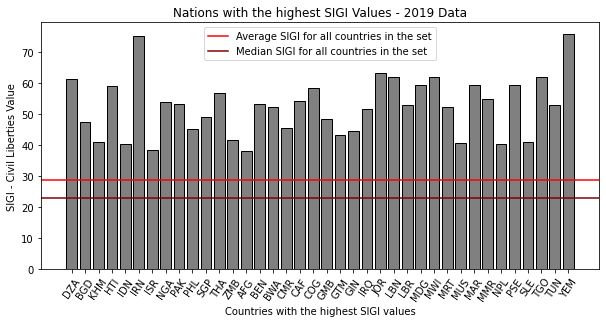

The countries: Yemen, Iran, Lebanon, Jordan, TOGO, have the highest SIGI.


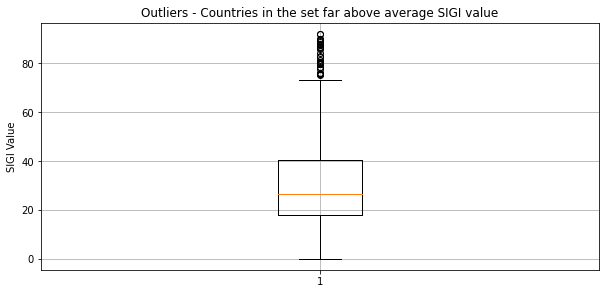

In [11]:
#Plotting the SIGI data, finding the nations with highest SIGI:

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.bar(Highest_SIGI["LOCATION"],Highest_SIGI["Value"],color = "grey",edgecolor = "black")
plt.axhline(y = 28.659854014598544, color = "red",label = "Average SIGI for all countries in the set")
plt.axhline(y = 22.9, color = "maroon",label = "Median SIGI for all countries in the set")
plt.xticks(rotation = 55)
plt.xlabel("Countries with the highest SIGI values")
plt.ylabel("SIGI - Civil Liberties Value")
plt.title("Nations with the highest SIGI Values - 2019 Data")
plt.legend()
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(2,1,2)
plt.boxplot(SIGI["Value"])
plt.grid()
plt.title("Outliers - Countries in the set far above average SIGI value")
plt.ylabel("SIGI Value")


# Finding highest SIGI countries:
Sort_High = Civil_Liberties.sort_values('Value',ascending=False)

print("The countries: Yemen, Iran, Lebanon, Jordan, TOGO, have the highest SIGI.")

**Violence and Political Power Statistics:**

Below this cell, I used the nations with the highest SIGI values (found above) to generate bar graphs of their individual percentages, in regard to the average and median global violence of the set. 

The Violence Against Women dataset was first filtered specifically for percentages of female violence experienced over a lifetime, then filtered again for only the countries found above.

The politics set was filtered only for the countries.

All the countries were then graphed individually with their percent values, and compared to the average/median violence or political power statistics of the set.


In [12]:
#Using SIGI Countries to get their violence stats:
MASK =  Violence["SUBJECT"] == "PREVVIOLLIFETIME" #Pulling only the indicator for violence experienced a lifetime:
V_Prevalence_Life = Violence[MASK]

Yemen = V_Prevalence_Life.loc[(V_Prevalence_Life["LOCATION"] == "YEM")]
Iran = V_Prevalence_Life.loc[(V_Prevalence_Life["LOCATION"] == "IRN")]
Lebanon = V_Prevalence_Life.loc[(V_Prevalence_Life["LOCATION"] == "LBN")]
Jordan = V_Prevalence_Life.loc[(V_Prevalence_Life["LOCATION"] == "JOR")]
Togo = V_Prevalence_Life.loc[(V_Prevalence_Life["LOCATION"] == "TGO")]
United_States = V_Prevalence_Life.loc[(V_Prevalence_Life["LOCATION"] == "USA")]

print("Average violence aginst women global value,",V_Prevalence_Life["Value"].mean())
print("Median violence against women global value,",V_Prevalence_Life["Value"].median())


#Using SIGI Countries to get their % Women Politics stats:

Yemen_Politics = F_Politics.loc[(F_Politics["LOCATION"] == "YEM")]
Iran_Politics = F_Politics.loc[(F_Politics["LOCATION"] == "IRN")]
Lebanon_Politics = F_Politics.loc[(F_Politics["LOCATION"] == "LBN")]
Jordan_Politics = F_Politics.loc[(F_Politics["LOCATION"] == "JOR")]
Togo_Politics = F_Politics.loc[(F_Politics["LOCATION"] == "TGO")]
USA_Politics = F_Politics.loc[(F_Politics["LOCATION"] == "USA")]

print("Average political power percentage value,",F_Politics["Value"].median())
print("Median political power percentage value,",F_Politics["Value"].mean())

Average violence aginst women global value, 28.96356589147287
Median violence against women global value, 24.6
Average political power percentage value, 24.5
Median political power percentage value, 25.49842209072977


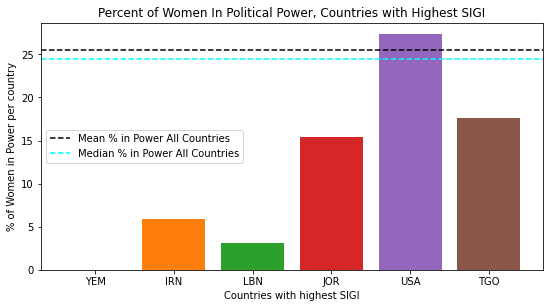

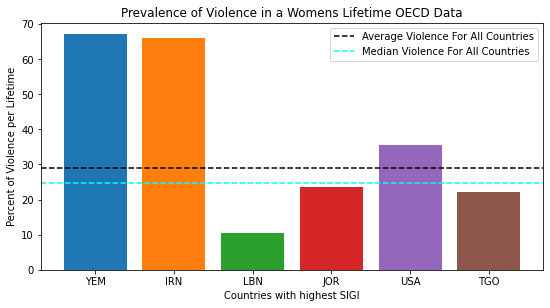

In [13]:
# Percent of women in positions of power for countries with highest SIGI:

plt.figure(figsize=(9,10))

plt.subplot(2,1,1)
plt.bar(Yemen_Politics["LOCATION"],Yemen_Politics["Value"])
plt.bar(Iran_Politics["LOCATION"],Iran_Politics["Value"])
plt.bar(Lebanon_Politics["LOCATION"],Lebanon_Politics["Value"])
plt.bar(Jordan_Politics["LOCATION"],Jordan_Politics["Value"])
plt.bar(USA_Politics["LOCATION"],USA_Politics["Value"])
plt.bar(Togo_Politics["LOCATION"],Togo_Politics["Value"])
plt.axhline(y = 25.49842209072977,color = "black", label = "Mean % in Power All Countries",linestyle = "--")
plt.axhline(y = 24.5,color = "cyan", label = "Median % in Power All Countries",linestyle = "--")
plt.xlabel('Countries with highest SIGI')
plt.ylabel("% of Women in Power per country")
plt.title("Percent of Women In Political Power, Countries with Highest SIGI")
plt.legend()
plt.show()

plt.figure(figsize=(9,10))

plt.subplot(2,1,2)
# Prevalence of Violence in a Womens Lifetime OECD Data GRAPH
plt.bar(Yemen["LOCATION"],Yemen["Value"])
plt.bar(Iran["LOCATION"],Iran["Value"])
plt.bar(Lebanon["LOCATION"],Lebanon["Value"])
plt.bar(Jordan["LOCATION"],Jordan["Value"])
plt.bar(United_States["LOCATION"],United_States["Value"])
plt.bar(Togo["LOCATION"],Togo["Value"])
plt.axhline(y = 28.96356589147287,color = "black", label = "Average Violence For All Countries",linestyle = "--")
plt.axhline(y = 24.6,color = "cyan", label = "Median Violence For All Countries",linestyle = "--")
plt.xlabel('Countries with highest SIGI')
plt.ylabel("Percent of Violence per Lifetime")
plt.title("Prevalence of Violence in a Womens Lifetime OECD Data")
plt.legend()
plt.show()

**What can be deduced from this information?**

As expected, every country with a high SIGI also has below average % of women in power. Yemen had a total of 0% of women in power, and they have the highest SIGI in the set. Yemen also had the highest violence percentage which also makes sense.


**Gender Inequality in relation to Global Development and Homicide Data**

Below this cell, I again filtered the Global Development set for the highest SIGI nations. This is because, it would be easier to analyze the results I find if I have a basis of information already discovered for these geographical areas.

After each country was selected, I plotted the life expectancies of women against the years available in the set. Yemen unfortunately only had data up until the 1990s. Nothing recent could be confirmed.


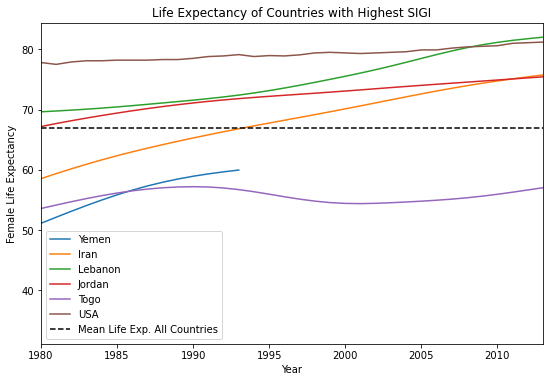

In [14]:
# Seperating the data for each country with high SIGI:
#601      YEM      SIGI  RESTRCIVLIB     IDX         A  2019   75.8         NaN
Global_Yemen = Global_Development.loc[(Global_Development["Country"] == "Yemen, Rep.")]

#208      IRN      SIGI  RESTRCIVLIB     IDX         A  2019   75.1         NaN
Global_Iran = Global_Development.loc[(Global_Development["Country"] == "Iran, Islamic Rep.")]

#468      LBN      SIGI  RESTRCIVLIB     IDX         A  2019   62.1         NaN
Global_Lebanon = Global_Development.loc[(Global_Development["Country"] == "Lebanon")]

#446      JOR      SIGI  RESTRCIVLIB     IDX         A  2019   63.1         NaN
Global_Jordan = Global_Development.loc[(Global_Development["Country"] == "Jordan")]

#575      TGO      SIGI  RESTRCIVLIB     IDX         A  2019   62.0         NaN
Global_Togo = Global_Development.loc[(Global_Development["Country"] == "Togo")]

#For comparison:
Global_USA = Global_Development.loc[(Global_Development["Country"] == "United States")]


plt.figure(figsize=(9,13))

plt.subplot(2,1,1)
plt.plot(Global_Yemen["Year"],Global_Yemen["Data.Health.Life Expectancy at Birth, Female"],label = "Yemen")
plt.plot(Global_Iran["Year"],Global_Iran["Data.Health.Life Expectancy at Birth, Female"], label = "Iran")
plt.plot(Global_Lebanon["Year"],Global_Lebanon["Data.Health.Life Expectancy at Birth, Female"], label = "Lebanon")
plt.plot(Global_Jordan["Year"],Global_Jordan["Data.Health.Life Expectancy at Birth, Female"], label = "Jordan")
plt.plot(Global_Togo["Year"],Global_Togo["Data.Health.Life Expectancy at Birth, Female"], label = "Togo")
plt.plot(Global_USA["Year"],Global_USA["Data.Health.Life Expectancy at Birth, Female"], label = "USA")
plt.xlim([1980,Global_Development["Year"].max()])
plt.axhline(y = 66.97974446158184,label = "Mean Life Exp. All Countries",color = "black",linestyle = "--")
plt.ylabel("Female Life Expectancy")
plt.xlabel("Year")
plt.title("Life Expectancy of Countries with Highest SIGI")
plt.legend()
plt.show()


Below this cell, I used another global data set, this time regarding violence.

It was filtered for geographical regions instead of individual countries, to get a broader idea of what is changing for women overtime globally.

I then plotted each regions female homicide percentage overtime.

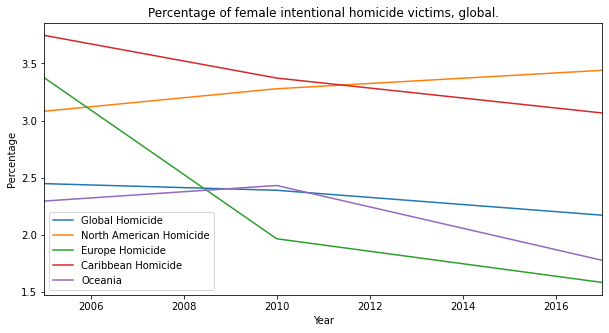

In [15]:
Int_H = Int_Homicide.loc[(Int_Homicide["Series"] == "Percentage of male and female intentional homicide victims, Female")]

Int_Global = Int_H.loc[(Int_H["Unnamed: 1"] == "Total, all countries or areas")]
Int_NA = Int_H.loc[(Int_H["Unnamed: 1"] == "Americas")]
Int_Europe = Int_H.loc[(Int_H["Unnamed: 1"] == "Europe")]
Int_C = Int_H.loc[(Int_H["Unnamed: 1"] == "Caribbean")]
Oceania = Int_H.loc[(Int_H["Unnamed: 1"] == "Oceania")]


plt.figure(figsize=(10,5))
plt.plot(Int_Global["Year"],Int_Global["Value"],label = "Global Homicide")
plt.plot(Int_NA["Year"],Int_NA["Value"], label = "North American Homicide")
plt.plot(Int_Europe["Year"],Int_Europe["Value"], label = "Europe Homicide")
plt.plot(Int_C["Year"],Int_C["Value"], label = "Caribbean Homicide")
plt.plot(Oceania["Year"],Oceania["Value"],label = "Oceania")
plt.xlim(Int_Global["Year"].min(),Int_H["Year"].max())
plt.title("Percentage of female intentional homicide victims, global.")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend()



**What can be concluded from this data:**

I found global data regarding all the SIGI top countries, and their life expectancy rates for Women. This data showed that life expectancy (except Yemen, it cuts off after 1980) is increasing in all nations. Women are living longer, so it makes sense how many of them were below the violence average in my previous figure.

I then found international homicide data against women and saw that in every country except the United States (or more generally, North America) has lowering homicide rates overtime.

This data tells me that violence against Women is still prevalent but is thankfully decreasing overtime!


# Linear Regression Model: Will the wage gap in the US continue?

Below this cell, I pulled the clean (no outliers) data set made earlier in the document, and separated the Industry/Corporate Employed Workers from the Self Employed Workers.

The wage gap values and the years they occurred for each employee indicator were then used to create best fit lines for their individual data.

The best fit is printed below. 

I plotted the best fit against the data, and to confirm accuracy, I created a function for Root Mean Square Error, which tells you how closely/tightly the data fits the line.

I used this to predict whether or not the wage gap will continue to decrease overtime!



In [16]:
#Pulling the two categories from the set with outliers removed:

Employee = Wage_Gap2.loc[(Wage_Gap2["SUBJECT"] == "EMPLOYEE")]
Self_Employed = Wage_Gap2.loc[(Wage_Gap2["SUBJECT"] == "SELFEMPLOYED")]

USA_E = Employee.loc[(Employee["LOCATION"] == "USA")]
USA_SE = Self_Employed.loc[(Self_Employed["LOCATION"] == "USA")]


# Lets make some predictions for Industry Employed workers: 
Parameters = np.polyfit(USA_E["TIME"],USA_E["Value"],1)
print("Slope and Y-Int of Best Fit for Employed Workers,",Parameters)

expected_slope = Parameters[0] 
y_int = Parameters[1]
y_expect = USA_E["TIME"]*expected_slope + y_int 

# Predictions for Self Employed workers:
Parameters2 = np.polyfit(USA_SE["TIME"],USA_SE["Value"],1)
print("Slope and Y-Int of Best Fit for Self Employed Workers,",Parameters2)

expected_slope2 = Parameters2[0] 
y_int2 = Parameters2[1]
y_expect2 = USA_SE["TIME"]*expected_slope2 + y_int2 


Slope and Y-Int of Best Fit for Employed Workers, [-5.09406272e-01  1.04312579e+03]
Slope and Y-Int of Best Fit for Self Employed Workers, [-3.63942090e-01  7.77695326e+02]


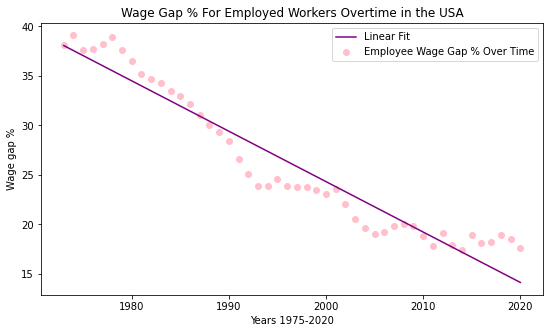

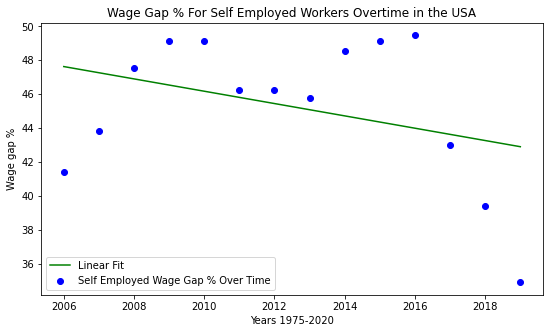

In [17]:
# Plotting the best fit for both indicators:

plt.figure(figsize=(9,11))
plt.subplot(2,1,1)
plt.scatter(USA_E["TIME"],USA_E["Value"],color = "pink",label = "Employee Wage Gap % Over Time")
plt.plot(USA_E["TIME"], y_expect, color = "purple", label = "Linear Fit") #plotting the numpy line version 
plt.xlabel("Years 1975-2020")
plt.ylabel("Wage gap %")
plt.title("Wage Gap % For Employed Workers Overtime in the USA")
plt.legend()
plt.show()

plt.figure(figsize=(9,11))
plt.subplot(2,1,2)
plt.scatter(USA_SE["TIME"],USA_SE["Value"],color = "blue",label = "Self Employed Wage Gap % Over Time")
plt.plot(USA_SE["TIME"], y_expect2, color = "green", label = "Linear Fit") #plotting the numpy line version 
plt.xlabel("Years 1975-2020")
plt.ylabel("Wage gap %")
plt.title("Wage Gap % For Self Employed Workers Overtime in the USA")
plt.legend()
plt.show()

# Getting the Root Mean Square Error (RMSE):

It tells you how concentrated the data is around the line of best fit!

In [18]:
# Creating a function that takes in the regular data, the fit model, and returns the root mean squared error: 
def RMSE(x_values,y_values,model):
    N_x = len(x_values)
    Sum_sq = 0
    for i in range(len(x_values)):
        Sum_sq += (y_values[i]-model(x_values[i]))**2
    RMSE = np.sqrt(Sum_sq/N_x)
    return RMSE

In [19]:
X_Vals = []

for i in USA_SE["TIME"]:
    X = i
    X_Vals.append(X)

Y_Vals = []
for i in USA_SE["Value"]:
    Y = i
    Y_Vals.append(Y)

Parameters2 = np.polyfit(USA_SE["TIME"],USA_SE["Value"],1)
My_Model = np.poly1d(Parameters2)

print("The RMSE of the Self Employed model is:",RMSE(X_Vals,Y_Vals,My_Model))

X_Val2 = []
for i in USA_E["TIME"]:
    X2 = i
    X_Val2.append(X2)
    
Y_Val2 = []
for i in USA_E["Value"]:
    Y2 = i
    Y_Val2.append(Y2)

Parameters1 = np.polyfit(USA_E["TIME"],USA_E["Value"],1)
My_Model2 = np.poly1d(Parameters1)


print("The RMSE of the Industry Employed model is:",RMSE(X_Val2,Y_Val2,My_Model2))

# A perfect model would have an RMSE of 0, since it would predict each data point with zero error.

The RMSE of the Self Employed model is: 3.921691878644857
The RMSE of the Industry Employed model is: 1.9969825423927585


**What can be observed from these regression plots and RMSE values?**

Well the RMSE for both plots was fairly low, and the closer it is to 0 the better fit the line is to the data so I do feel that the wage gap for both industry and self-employed workers will continue to decrease with time. I was surprised to find that in 2020 it didn't spike up drastically because of the shortage of workers and more mothers required unemployment due to coronavirus preventing their children from going to school/daycare.

The self-employed data was very "all over the place," to begin with, so I am less surprised that the best fit lines RMSE value was almost double the Industry employed one. Self-employed work can be done in so many different ways, from contractor work to online stores like Etsy, etc.. Looking at the graph it seems to be decreasing significantly the last few years.



# Results:

Below this cell is all the plots used for the results to my answers in the discussion cell.

## What did you find when you carried out your methods?**

**Method #1, Researching the Wage Gap Issue:**

I found that, not only is the wage gap still occurring, but the United States has the largest wage gap in the world. Thankfully, it is decreasing over time significantly.

I found that almost all countries with a large wage gap have issues with income inequality, meaning that women are being paid less than men often in countries where wealth is unevenly distributed throughout. This means that many industries and corporations dominate the market and basically have formed modern day monopolies. 

"Men make up an overwhelming majority of top earners across the U.S. economy, even though women now represent almost half of the country’s workforce." - Inequality.Org

**Comparing these findings to research**

After finding my Income Inequality results, I looked further into it and found that:

A lot of these corporations are based around STEM industries, like APPLE, Microsoft, e.t.c. STEM fields have barriers of access to women, especially women of color. Many POC in the United States are born into poverty or areas of low income,

According to the National Center for Children in Poverty: "58% (5,458,150) of black children live in low-income families, 53% (9,598,174) of Hispanic children live in low-income families, and 55% (297,307) of American Indian children live in low-income families."

Women of color experience this more often because lower income families have limited access to education, which is why countries with larger income inequality tend to have a larger wage gap.

Unrelated to income inequality, I want to mention that: (working mothers was not included in my method, I just wanted to cover the topic thoroughly)

Even with access to education, women earn less in the same fields. Complex factors such as children and gender bias are a large portion of the wage gap.

The American Association of University Women states, "The pay gap exists in nearly every profession. Fields with the smallest pay gaps are food workers, writers, counselors, pharmacists and social workers, where women earn within 97–99% of what their male colleagues do." 

The OECD data for the wage gap included information about working mothers: "The motherhood penalty amounts to about a 7% wage reduction per child."

According to the AAUW: "Women with bachelor’s degrees working full time are paid 26% less than their male counterparts, and Mothers face an even wider pay gap than women without kids."


**Method #2, Understanding Other Gender Inequality Issues:**

Using the Social Institutions and Gender Index, I wanted to focus on how women are treated globally in comparison to men. I found that a significantly large number of countries have an extremely large SIGI value for Lack of Civil Liberties for women. Because of the volume of countries which this SIGI score, I separated the top five from the rest of the data, and used those countries to find out why.

Using a dataset on women in politics, I found that countries with little rights for women tended to have relatively no women running their governmental policies. This is critical because it indicates that women are not experiencing the same balance of power that can effect change. 

I also found that a few of the nations with high SIGI values (Yemen and Iran) had significantly above average reports of violence against women. This shows me that not only are women struggling with power imbalance from barriers to entry and gender bias, but that often violence is an issue preventing them from becoming political leaders or having access to civil liberties.

On a good note, I used CORGIS Global Development Data, as well as Global Homicide Data from Data.Un / Kaggle to see if the current state of violence against women was decreasing similarly to the wage gap, and evidence suggests that it is. I used the live expectancy of women data for all the same countries, and found that (except for Yemen, data stops in 1990s) Women are living longer as time goes on. This suggests to me that better health programs are being funded/created, and violence is decreasing overtime. 

I used another dataset containing geographical regions and data related to female homicide victims, and this data also showed that physical violence is on a downward slope for every region in thr world except North America. 

Side Note Regarding the North America Statistics - 

US Department of Justice - "Crime rates have varied over time, with a sharp rise after 1900 and reaching a broad bulging peak between the 1970s and early 1990s. After 1994, crime rates began to fall year by year. This trend lasted until 2015, where crime rates began to rise slightly. This reversed in 2018 and 2019, but violent crime increased significantly again in 2020."

Current - Provisional data from the CDC's National Center for Health Statistics, suggest the homicide rate for the United States rose 30% between 2019 and 2020.

**Comparing my findings to research:**

UnWomen.Org states: "Globally, violence against women disproportionately affects low- and lower-middle-income countries and regions."

My research showed that the top SIGI nations tended to be from the less-developed regions of the world. Because there are not many women in governmental positions, sexism in positions of power is prevalent and violence goes unreported to police of other gov/law officials. Even with the few women in power, the conditions of the country they're serving make it very difficult to enact change against violence and reduced civil liberties because:

"Across five regions, 82 per cent of women parliamentarians reported having experienced some form of psychological violence while serving their terms." - UnWomen.Org

In regard to the life expectancy increasing for the countries with high SIGI, The Population Reference Bureau states:
"The Middle East and North Africa (MENA) region has experienced major improvements in health over the past few decades.1 Today, on average, a girl born in Egypt is expected to live for 72 years—nearly 20 years longer than if she had been born in the early 1970s—owing in large part to a 70 percent improvement in infant mortality rates over the same time period."

I did not cover human trafficking, child marriage, sexual harassment, and many of the subcategories of violence that are contributing to gender inequality, but I want to mention that these are among the numerous obstacles women face globally and are still largely in-place globally and require attention.

SIGI - "As underlying drivers of gender inequalities, discriminatory social institutions perpetuate gender gaps in development areas, such as education, employment and health, and hinder progress towards rights-based social transformation that benefits both women and men."


**Method #3 Making Predictions**

Using linear regression (from the NumPy polyfit function) I was able to plot the data of the wage gap for the United States against the best fit trendline. I used both indicators, from self-employed to industry employed, and the fit expressed a strong negative correlation for industry employed workers. There was a negative correlation or self-employed, just not as strong/apparent.

I concluded from this and the RMSE values that the wage gap will likely continue its downhill spiral, and thankfully so, because women need to be paid equally for the same labor and hours worked as their male counterparts. The RSME showed that the Employed line was a stronger fit than the Self Employed one, but I suspect this is due to the amount of data varying for both and the way that self-employed workers vary in jobs and reporting income.

**Comparing my findings to research**

I am getting my current wage gap statistics from the following research website/facility: "Pew Research Center is a nonpartisan fact tank that informs the public about the issues, attitudes and trends shaping the world. We conduct public opinion polling, demographic research, content analysis and other data-driven social science research."

My regression predicts the wage gap will continue to decrease; Pew Research says:
"In 1980, women ages 25 to 34 earned 33 cents less than their male counterparts, compared with 7 cents in 2020. The estimated 16-cent gender pay gap among all workers in 2020 was down from 36 cents in 1980."

But they also mention that the decrease has been stagnant for 2020. I believe this is due to Corona Virus effecting employment and childcare available to mothers. To confirm this, I found from Inequality.Org that: 
"Women tend to bear more responsibility for family caregiving, they were more likely than men to drop out of the labor force, particularly in the first phase of the pandemic. April, as the pandemic nearly shut down the economy, these rates sharply diverged, with the female unemployment spiking to 16.2 percent, compared to 13.5 percent for men."

As well as "Women are more likely than men to work in service occupations, including domestic work, restaurant service, retail, tourism, and hospitality, that require face-to-face interactions and have been hard-hit by layoffs." Which is also from Inequality.org

To conclude, there are a great many factors that are difficult to measure, like including gender discrimination/bias, these may also be primarily contributing to the ongoing wage discrepancy.


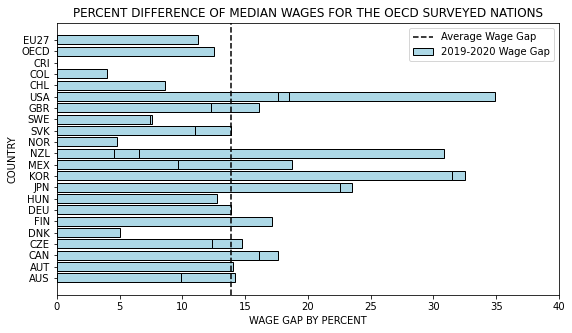

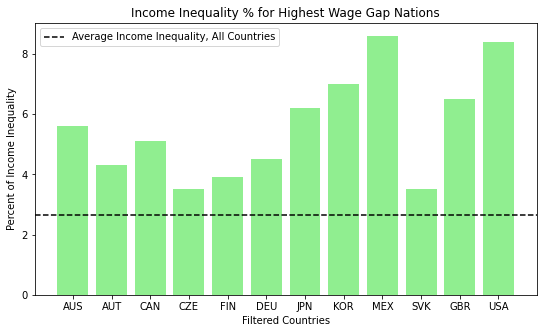

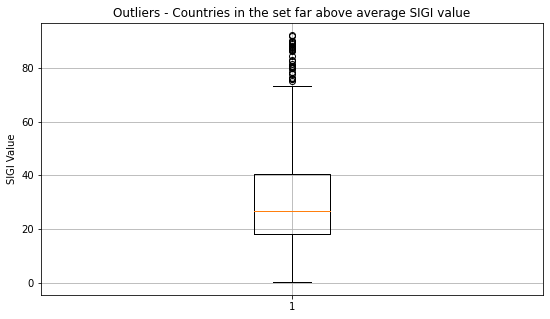

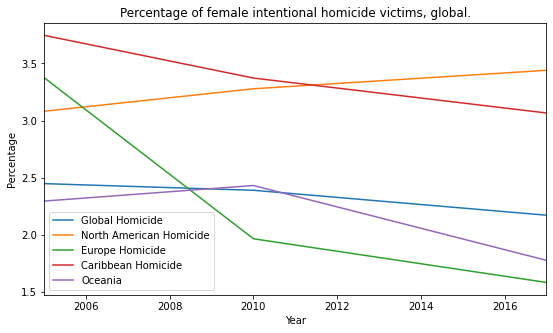

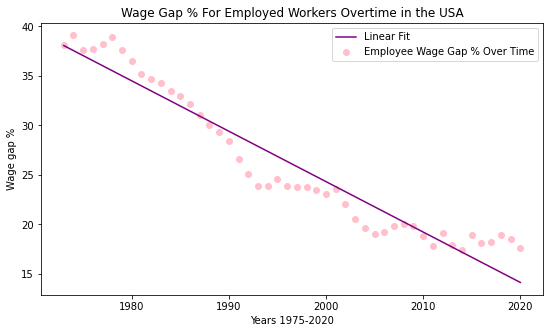

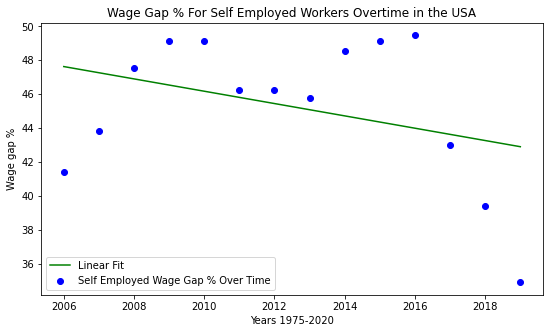

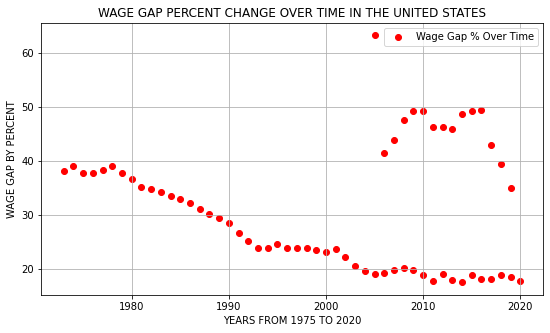

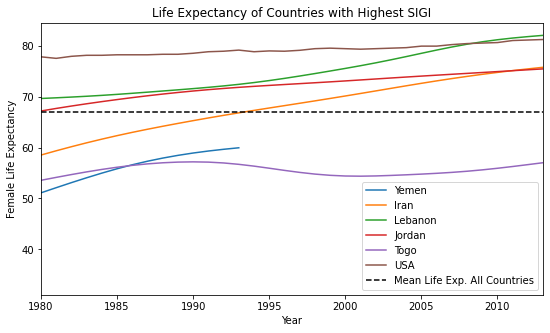

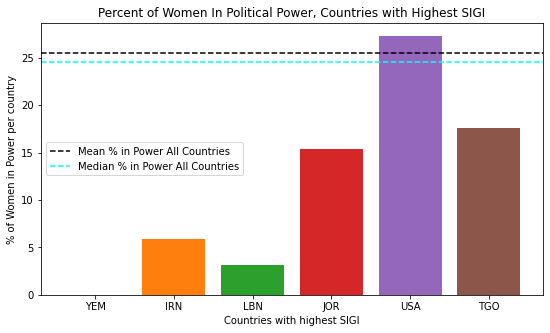

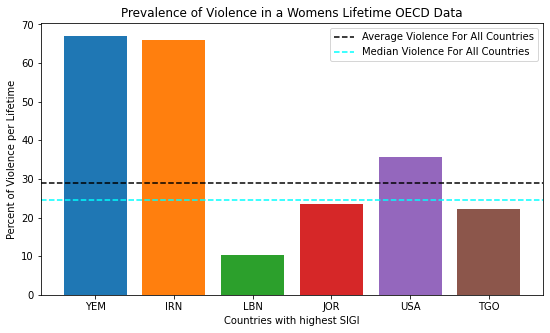

In [52]:
# Highest Wage Gap Nations OECD
plt.figure(figsize=(9,11))
plt.subplot(2,1,1)
plt.barh(Current_Gap["LOCATION"],Current_Gap["Value"],color = "lightblue",label = "2019-2020 Wage Gap",edgecolor = "black")
plt.ylabel("COUNTRY")
plt.xlim([0,40])
plt.axvline(x = 13.855060791192647, label = "Average Wage Gap",color = "black",linestyle = "--")
plt.xlabel("WAGE GAP BY PERCENT")
plt.title("PERCENT DIFFERENCE OF MEDIAN WAGES FOR THE OECD SURVEYED NATIONS")
plt.legend()
plt.show()

#Income Inequality for Highest Wage Gap Countries Above
plt.figure(figsize=(9,11))
plt.subplot(2,1,2)
plt.bar(Income_Filtered["LOCATION"],Income_Filtered["Value"], color = "lightgreen")
plt.axhline(y = 2.642837004405292, color = "black",label = "Average Income Inequality, All Countries",linestyle = "--")
plt.xlabel("Filtered Countries")
plt.ylabel("Percent of Income Inequality")
plt.title("Income Inequality % for Highest Wage Gap Nations")
plt.legend()
plt.show()

#Boxplot for SIGI Countries
plt.figure(figsize=(9,11))
plt.subplot(2,1,1)
plt.boxplot(SIGI["Value"])
plt.grid()
plt.title("Outliers - Countries in the set far above average SIGI value")
plt.ylabel("SIGI Value")
plt.show()

#Homicide Female Global Graph
plt.figure(figsize=(9,11))
plt.subplot(2,1,2)
plt.plot(Int_Global["Year"],Int_Global["Value"],label = "Global Homicide")
plt.plot(Int_NA["Year"],Int_NA["Value"], label = "North American Homicide")
plt.plot(Int_Europe["Year"],Int_Europe["Value"], label = "Europe Homicide")
plt.plot(Int_C["Year"],Int_C["Value"], label = "Caribbean Homicide")
plt.plot(Oceania["Year"],Oceania["Value"],label = "Oceania")
plt.xlim(Int_Global["Year"].min(),Int_H["Year"].max())
plt.title("Percentage of female intentional homicide victims, global.")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend()
plt.show()

#Wage Gap Linear Regression Plot Employed
plt.figure(figsize=(9,11))
plt.subplot(2,1,1)
plt.scatter(USA_E["TIME"],USA_E["Value"],color = "pink",label = "Employee Wage Gap % Over Time")
plt.plot(USA_E["TIME"], y_expect, color = "purple", label = "Linear Fit") #plotting the numpy line version 
plt.xlabel("Years 1975-2020")
plt.ylabel("Wage gap %")
plt.title("Wage Gap % For Employed Workers Overtime in the USA")
plt.legend()
plt.show()

#Wage Gap Linear Regression Plot Self Employed
plt.figure(figsize=(9,11))
plt.subplot(2,1,2)
plt.scatter(USA_SE["TIME"],USA_SE["Value"],color = "blue",label = "Self Employed Wage Gap % Over Time")
plt.plot(USA_SE["TIME"], y_expect2, color = "green", label = "Linear Fit") #plotting the numpy line version 
plt.xlabel("Years 1975-2020")
plt.ylabel("Wage gap %")
plt.title("Wage Gap % For Self Employed Workers Overtime in the USA")
plt.legend()
plt.show()

#Wage Gap USA Original
plt.figure(figsize=(9,11))
plt.subplot(2,1,1)
plt.scatter(USA_Gap["TIME"],USA_Gap["Value"],color = "red",label = "Wage Gap % Over Time")
plt.xlabel("YEARS FROM 1975 TO 2020")
plt.ylabel("WAGE GAP BY PERCENT")
plt.grid()
plt.title("WAGE GAP PERCENT CHANGE OVER TIME IN THE UNITED STATES")
plt.legend()

# Life Expectancy Plot
plt.figure(figsize=(9,11))
plt.subplot(2,1,2)
plt.plot(Global_Yemen["Year"],Global_Yemen["Data.Health.Life Expectancy at Birth, Female"],label = "Yemen")
plt.plot(Global_Iran["Year"],Global_Iran["Data.Health.Life Expectancy at Birth, Female"], label = "Iran")
plt.plot(Global_Lebanon["Year"],Global_Lebanon["Data.Health.Life Expectancy at Birth, Female"], label = "Lebanon")
plt.plot(Global_Jordan["Year"],Global_Jordan["Data.Health.Life Expectancy at Birth, Female"], label = "Jordan")
plt.plot(Global_Togo["Year"],Global_Togo["Data.Health.Life Expectancy at Birth, Female"], label = "Togo")
plt.plot(Global_USA["Year"],Global_USA["Data.Health.Life Expectancy at Birth, Female"], label = "USA")
plt.xlim([1980,Global_Development["Year"].max()])
plt.axhline(y = 66.97974446158184,label = "Mean Life Exp. All Countries",color = "black",linestyle = "--")
plt.ylabel("Female Life Expectancy")
plt.xlabel("Year")
plt.title("Life Expectancy of Countries with Highest SIGI")
plt.legend()
plt.show()

#Political Power Plot
plt.figure(figsize=(9,11))
plt.subplot(2,1,1)
plt.bar(Yemen_Politics["LOCATION"],Yemen_Politics["Value"])
plt.bar(Iran_Politics["LOCATION"],Iran_Politics["Value"])
plt.bar(Lebanon_Politics["LOCATION"],Lebanon_Politics["Value"])
plt.bar(Jordan_Politics["LOCATION"],Jordan_Politics["Value"])
plt.bar(USA_Politics["LOCATION"],USA_Politics["Value"])
plt.bar(Togo_Politics["LOCATION"],Togo_Politics["Value"])
plt.axhline(y = 25.49842209072977,color = "black", label = "Mean % in Power All Countries",linestyle = "--")
plt.axhline(y = 24.5,color = "cyan", label = "Median % in Power All Countries",linestyle = "--")
plt.xlabel('Countries with highest SIGI')
plt.ylabel("% of Women in Power per country")
plt.title("Percent of Women In Political Power, Countries with Highest SIGI")
plt.legend()
plt.show()

# Prevalence of Violence in a Womens Lifetime OECD Data GRAPH
plt.figure(figsize=(9,11))
plt.subplot(2,1,2)
plt.bar(Yemen["LOCATION"],Yemen["Value"])
plt.bar(Iran["LOCATION"],Iran["Value"])
plt.bar(Lebanon["LOCATION"],Lebanon["Value"])
plt.bar(Jordan["LOCATION"],Jordan["Value"])
plt.bar(United_States["LOCATION"],United_States["Value"])
plt.bar(Togo["LOCATION"],Togo["Value"])
plt.axhline(y = 28.96356589147287,color = "black", label = "Average Violence For All Countries",linestyle = "--")
plt.axhline(y = 24.6,color = "cyan", label = "Median Violence For All Countries",linestyle = "--")
plt.xlabel('Countries with highest SIGI')
plt.ylabel("Percent of Violence per Lifetime")
plt.title("Prevalence of Violence in a Womens Lifetime OECD Data")
plt.legend()
plt.show()

# Discussion and Conclusion

**What did you learn from your results?**
I learned that the women’s median earnings in comparison to men’s are still not equal in many nations and it is largely due to income inequality and barriers to access.
I also learned that overall violence has gone down globally and that majority of the places where violence is extremely prevalent are less-developed nations with few women in political power or access to civil liberties women have in more developed nations.



**What obstacles did you run into?**
I found it overwhelming to try and cover the amount of issues effect women today. I had a dataset about education, child marriage, human trafficking, women labor hours dependent on ethnicity, women’s access to healthcare, and a few more that really would have brought the whole project home, but there was no way I would have enough time 9and maybe expertise) to include all of them. I really wanted to cover just the general aspects of the issues and how they're still effecting women today.

**What would you do differently next time?**
Pick smaller areas of focus, like the wage gap. I had too broad of a topic when I tried to cover general women’s inequality issues and ended up bringing many datasets in trying to cover my bases. I would also have started a bit earlier, but with my other classes finals coming up, I was really focusing on calculus. I also would have done less information about violence, but I thought some positivity regarding the global state of women’s rights would benefit the project. (Violence decreasing overtime)

**What is the answer to your question(s) and why?**

1. Is the Wage Gap still occurring, and what are it's root causes?
Yes, the difference between men and women's average/median earnings is still significant and occurs worldwide. 
From the research I have done, the primary cause in the developed nations seems to be income inequality.
For global occurrences, the primary causes are the lack women holding positions of power, occupational segregation, and restricted civil liberties.

2. Is gender inequality as prevalent in the US as it is too other less developed nations?
Yes, gender inequality still occurs in the United States, although it is not as frequent, or as at large, as the issues that plague other less developed nations. This does not make the issue any less important.
My results show that in many instances, it has gone significantly down overtime, such as the wage gap and violence against women globally.
	
3. What other gender inequality issues are common besides the wage gap?
The common gender inequality issues are as follows:
Lack of civil liberties/personal rights in less developed nations
Occupational Segregation/Sexism or Gender Bias
Not enough Women holding political/governmental positions of power that can affect change
Violence against women globally
(These are just the ones I could get into my project before the deadline)


# References

https://www.prb.org/ - Population Reference Bureau, PRB is a nonpartisan research organization focused on improving the health and well-being of people globally through evidence-based policies and practices.

https://inequality.org/ - Inequality.org has been tracking inequality-related news and views for nearly two decades. A project of the Institute for Policy Studies since 2011, our site aims to provide information and insights for readers ranging from educators and journalists to activists and policy makers.

https://www.pewresearch.org/about/ - Pew Research Center is a nonpartisan fact tank that informs the public about the issues, attitudes and trends shaping the world. We conduct public opinion polling, demographic research, content analysis and other data-driven social science research. We do not take policy positions.

https://www.aauw.org/about/ - The American Association of University Women, officially founded in 1881, is a non-profit organization that advances equity for women and girls through advocacy, education, and research.

https://corgis-edu.github.io/corgis/ - The Collection of Really Great, Interesting, Situated Datasets
By Austin Cory Bart, Ryan Whitcomb, Jason Riddle, Omar Saleem, Dr. Eli Tilevich, Dr. Clifford A. Shaffer, Dr. Dennis Kafura

https://www.kaggle.com/ - Kaggle, a subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners. 

https://www.oecd.org/unitedstates/ - The Organisation for Economic Co-operation and Development is an intergovernmental economic organisation with 38 member countries, founded in 1961 to stimulate economic progress and world trade.


# Thanks for the amazing semester!